# Learning From Data

This is an exercise which is a part of the homework 1 of [Learning from Data](http://work.caltech.edu/homeworks.html) course

In [31]:
import scipy.stats as ss

In [105]:
import numpy as np

In [114]:
from scipy import linalg

In [73]:
import matplotlib.pyplot as plt

In [217]:
import pandas as pd

## question 4

In [41]:
ss.binom.rvs(1, 0.55, size=10)

array([0, 1, 1, 1, 1, 1, 0, 0, 1, 1])

In [33]:
ss.binom.pmf(0, 10, 0.55)

0.0003405062891601558

In [60]:
ss.binom.pmf(0, 10000, 0.55)

0.0

In [34]:
ss.binom.pmf(1, 1000, 0.0003405062891601558)

0.24230805846252851

In [42]:
def get_marbles(n_marble):
    return ss.binom.rvs(1, 0.55, size=n_marble)

In [54]:
def check_sample_has_red(sample):
    check = 0
    for s in sample:
        if s == 1:
            check = 1
    return check

In [55]:
check_sample_has_red(get_marbles(10))

1

In [56]:
def run_sample(number):
    no_red = 0
    for i in range(number):
        if check_sample_has_red(get_marbles(10)) is 0:
            no_red = no_red + 1
    return no_red

In [57]:
run_sample(10000)

6

In [58]:
run_sample(100000)

39

In [59]:
test = [1, 10, 100, 1000, 10000, 100000]
out = list()
for t in test:
    out.append(run_sample(t))
print(out)

[0, 0, 0, 2, 1, 29]


## The perceptron Learning Algorithm, question 7-10 

In [466]:
def get_target_function():
    x = ss.uniform.rvs(-1, scale=2, size=2)
    y = ss.uniform.rvs(-1, scale=2, size=2)
    A = np.array([[x[0], 1], [x[1], 1]])
    b = np.array([y[0], y[1]])
    param = np.linalg.inv(A).dot(b)
    return param

In [467]:
def get_data(target):
    x = ss.uniform.rvs(-1, scale=2, size=1)
    y = ss.uniform.rvs(-1, scale=2, size=1)
    ty = target[0]*x + target[1]
    if (y - ty) >= 0:
        b = 1
    else:
        b = -1
    return x, y, b

In [468]:
def pla(dataset, w0, w1, w2):
    x = list()
    y = list()
    b = list()
    for i in range(len(dataset)):
        temp = dataset.iloc[i]
        weight = np.array([[w0, w1, w2]])
        x_ = np.array([[1, temp['x'], temp['y']]])
        h = np.sum(weight*x_)
        # not match
        if (h*temp['b'] <= 0):
            x.append(temp['x'])
            y.append(temp['y'])
            b.append(temp['b'])
    out = {'x': x, 'y': y, 'b': b}
    return pd.DataFrame(out)

In [469]:
def update_weight(misclas, w1, w2):
    sample = misclas.sample(n=1)
    w1 = w1 + sample['x']*sample['b']
    w2 = w2 + sample['y']*sample['b']
    return w1.values[0], w2.values[0]

In [470]:
def converge(data_set):
    w0 = 0.0
    w1 = 0.0
    w2 = 0.0
    for i in range(1000):
        output = pla(data_set, w0, w1, w2)
        if (len(output) == 0):
            print('After {} iterations, all points are classfied'.format(i+1))
            break
        else:
            w1, w2 = update_weight(output, w1, w2)
    if (i+1) == 1000:
        print('After 1000 iterations, no solution is found')
    return i+1

In [471]:
def multiple_run(data_set, num_run):
    trial = list()
    for i in range(num_run):
        num_iter = converge(data_set)
        trial.append(num_iter)

In [472]:
target = get_target_function()

In [473]:
num_data = 10
data = np.zeros([num_data, 3])
for i in range(num_data):
    x, y, b = get_data(target)
    data[i] = [x, y, b]

In [474]:
dataset = pd.DataFrame(data)

In [475]:
dataset.columns = ['x', 'y', 'b']

In [476]:
postive = dataset[dataset['b'] > 0.0]
negative = dataset[dataset['b'] < 0.0]

In [477]:
fig, ax = plt.subplots(1, 1)

In [478]:
ax.set_xlim(-1.0, 1.0)
ax.set_ylim(-1.0, 1.0)

(-1.0, 1.0)

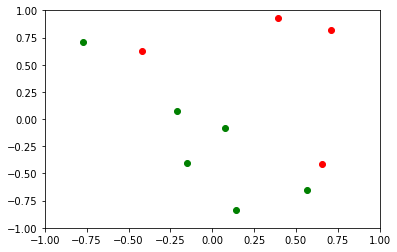

In [479]:
ax.plot(postive['x'], postive['y'], 'ro')
ax.plot(negative['x'], negative['y'], 'go')
plt.show()

In [480]:
multiple_run(dataset, 10)

After 21 iterations, all points are classfied
After 18 iterations, all points are classfied
After 15 iterations, all points are classfied
After 16 iterations, all points are classfied
After 8 iterations, all points are classfied
After 17 iterations, all points are classfied
After 8 iterations, all points are classfied
After 17 iterations, all points are classfied
After 13 iterations, all points are classfied
After 13 iterations, all points are classfied
